In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv("C:\\Users\\sanja\\Downloads\\Student_Performance.csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [3]:
df.info() # information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [4]:
df.isnull().sum() # any null value

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [5]:
df.duplicated().sum() # there are 127 duplicate rows are in the dataset

127

In [6]:
df.drop_duplicates(inplace=True) # remove dataset

In [7]:
df.duplicated().sum() # no duplicates

0

In [8]:
df.replace({'Yes':1, 'No':0}, inplace=True)

In [9]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

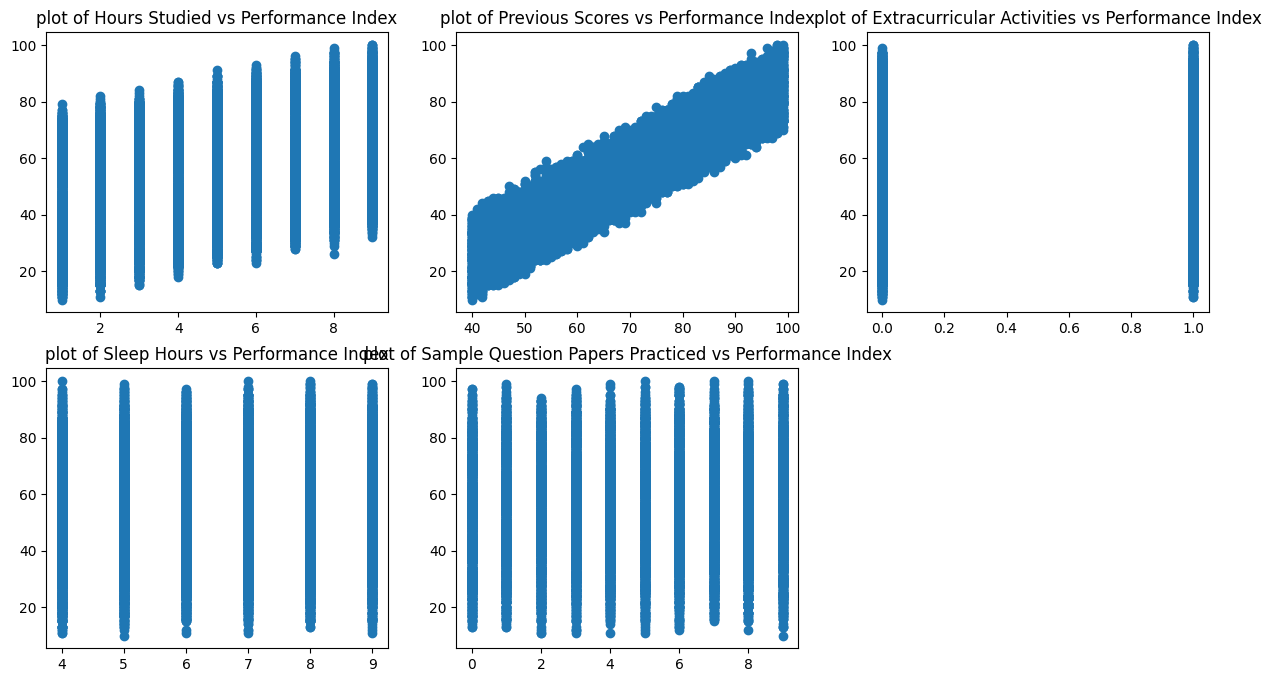

In [10]:
plt.figure(figsize=(15,8))
j=1
for i in df.columns:
    if(i != "Performance Index"):
        plt.subplot(2,3,j)
        plt.scatter(x=i, y="Performance Index", data=df)
        plt.title(f"plot of {i} vs Performance Index")
        j = j+1

In [11]:
df.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.010676,0.004899,0.002131,0.015740,0.375332
Previous Scores,-0.010676,1.000000,0.009534,0.007975,0.008719,0.915135
Extracurricular Activities,0.004899,0.009534,1.000000,-0.024008,0.013839,0.026075
Sleep Hours,0.002131,0.007975,-0.024008,1.000000,0.004907,0.050352
Sample Question Papers Practiced,0.015740,0.008719,0.013839,0.004907,1.000000,0.043436
Performance Index,0.375332,0.915135,0.026075,0.050352,0.043436,1.000000


In [12]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [24]:
X = df.drop(columns=['Performance Index'], axis=1)


In [38]:
y = df['Performance Index']
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 9873, dtype: float64

In [26]:
X_train, X_test , y_train, y_test = y = train_test_split(X, y , test_size=0.2, random_state=2)

In [27]:
model = LinearRegression()

In [28]:
model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_predicted =model.predict(X_test)

In [30]:
r2_score(y_test, y_predicted)

0.9894961318217907

In [31]:
np.sqrt(mean_squared_error(y_test, y_predicted))

1.9869849214732593

In [40]:
import statsmodels.api as sm 
new_X = sm.add_constant(X)
lm = sm.OLS(y, new_X).fit()


In [41]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.724e+05
Date:                Fri, 01 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:25:36   Log-Likelihood:                -21065.
No. Observations:                9873   AIC:                         4.214e+04
Df Residuals:                    9867   BIC:                         4.219e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                              -34.0689      0.128   -265.875      0.000     -34.320     -33.818
Hours Studied                        2.8527      0.008    358.940      0.000       2.837       2.868
Previous Scores                      1.0183      0.001    857.427      0.000       1.016       1.021
Extracurricular Activities           0.6167      0.041     14.981      0.000       0.536       0.697
Sleep Hours                          0.4803      0.012     39.623      0.000       0.457       0.504
Sample Question Papers Practiced     0.1939      0.007     27.017      0.000       0.180       0.208
==============================================================================
Omnibus:                        3.123   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.210   Jarque-Bera (JB):                3.224
Skew:                           0.014   Prob(JB):                        0.200
Kurtosis:                       3.084   Cond. No.                         451.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""